***
# Machine Learning: An Overview

Author: Olatomiwa Bifarin. <br>
PhD Candidate Biochemistry and Molecular Biology <br>
@ The University of Georgia

_This is a draft copy, a work in progress_

## Notebook Content

1.  [Definition](#1) <br>
2.  [ML Problems](#2) <br>
3.  [A Few ML Concepts](#3) <br>

## 1. Definition
<a id="1"></a>

I have come across many definitions for machine learning, however none is as expantiative as Tom Michell's namely: <br>

`"A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E."`

An example: <br> 
Task `T`: Classify a subject as having Parkinson's disease or not <br>
Experience `E`: Voice measurements data and corresponding labels. <br>
Performance `P`: Accuracy of classification. 

Mathematically speaking, the goal is to figure out an approximating function $f$

$$f:X\rightarrow Y$$
Where $X$ are the features and labels and $Y$ the predictions.

## 2. ML Problems
<a id="2"></a>

Now, as you might have guessed, there are different types of task `T`, and the different kind of task `T` would be handled differently. Take the Parkinson's disease example above: that is what is called a <mark>classification</mark> problem, and it is expressed here in it's simplest form: binary classification. Let's say a few things about this (and similar) problems before I proceed to some other machine learning problems.

Given the following training samples ${(x_{1},y_{1}),(x_{2},y_{2})...(x_{n},y_{n})}$,  where $x$ represent the voice measurement data and $y \in {0,1}$. The goal is to train a model and make a prediction on unlabeled voice measurement data. Once a prediction is made, we want to capture if we are doing well. We do this via something called the `loss function` or sometimes `cost function`. For a binary classification problem, it's defined as such: 

$$ c(y, f(x)) = 
\begin{cases}
0 & \text{ if } y=f(x) \\
1 & \text{ if } y \neq f(x)
\end{cases}$$

This kind of classification is called `supervised classification`: supervised because we have the labels. It doesn't take much to figure out that the other kind is called `unsupervised classification` - a kind of classification problem without labels. This can be thought of as a <mark>clustering</mark> problem, and as the name suggests ML algorithms are used to clusters samples based on some similarity heuristics. <br> 

A careful reader will note that in the above examples, what we are attempting to predict is a qualitative variable, and this is not always the case. Now, check this out: _Given the quantified metabolites in a cancer patient's urine, can we predict the size of tumor?_ The target variable here is a quantitative variable (the tumor size), and this is what is called a <mark>regression</mark> problem. 

However, classification and regression algorithms are very much connected; for example, many classification algorithms predict classes by first estimating probabilities of classes, in this way they behave like a regression method. Also, in logistic regression for example, a regression algorithm actually does predicts a quantitative variable. 

Another popular kind of a ML problem is called <mark>ranking</mark>. And here is an example: I type the following words into a search engine like google: _what are ranking machine learning problems?_ To solve the problem effectively, the algorithm will have to give me a ranked output of what I might like. This turns out to be an interesting machine learning problem. Other kinds of ML problems incude <mark>reinforcement learning</mark>, <mark>representation learning</mark>, <mark>collaborative filtering</mark>, <mark>anomaly detection</mark> etc. I will be writing on many of these in future blogs. 

## 3. A Few ML Concepts
<a id="3"></a>

### Model Fitting

Of what use is a car that cannot move. Of what use is a machine learning algorithms that cannot learn (i.e. generalize). And a ML algorithm generalizes well when it does not `underfit` or `overfit`. This simple analogy will work. Take a 12 year old girl studying for an exam, one could think of two ways she could fail the exam. 1) If she fails to study the materials well enough, 2) If she memorizes the examples in the class notes and fail to understand the concepts that will be tested in an exam. 1) is the analogy for underfitting: this is the case when the ML model fails to  generalize because it hasn't learnt the pattern in the training dataset well. For point 2), the analogy works for overfitting: a model overfits when it had 'memorize' the training data so well that generalization on the test data fails.  

In the following codes (and figures) below, I will give a pictorial illustration of this concept: 

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
#For Seaborn plots
import seaborn as sns; sns.set(style='white')

# More sharp and legible graphics
%config InlineBackend.figure_format = 'retina'

# Set seaborn figure labels to 'talk', to be more visible. 
sns.set_context('talk', font_scale=0.8)

A dummy dataset we will like to model

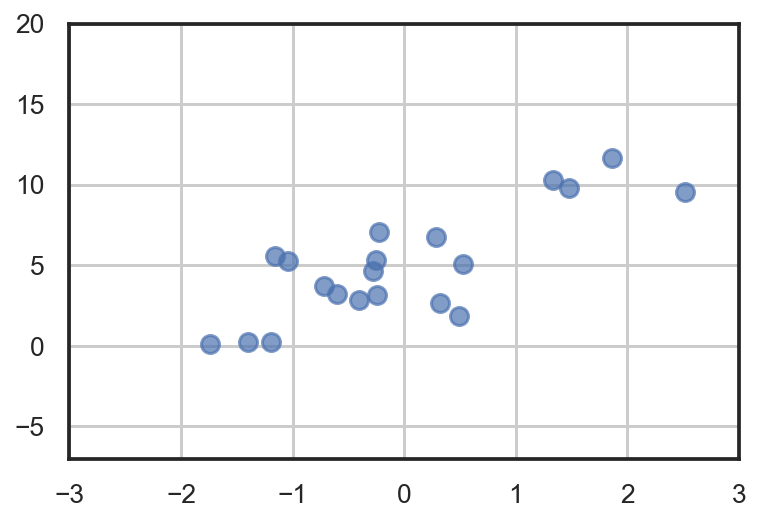

In [43]:
from numpy.random import randn
x = randn(20)
y = 3*x + 5 + randn(20)*2
plt.axis([-3, 3, -7, 20])
plt.scatter(x, y, alpha=0.7)
plt.grid(True)
plt.show()

In [13]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

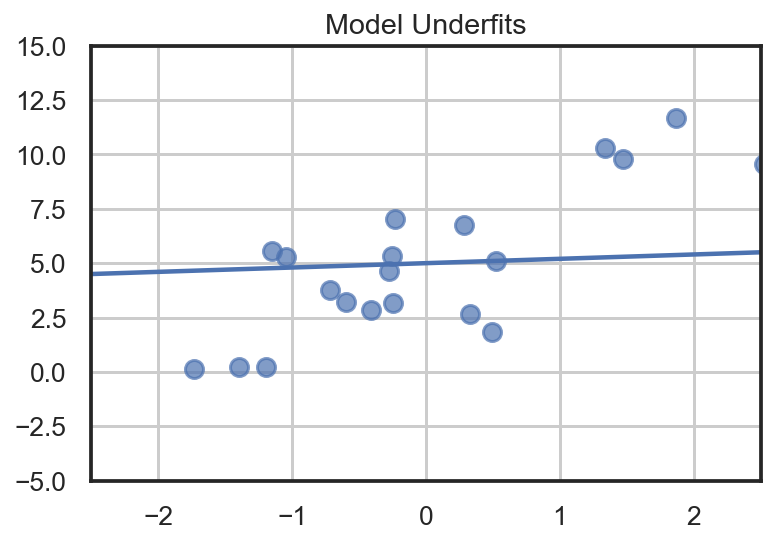

In [46]:
plt.axis([-2.5, 2.5, -5, 15])
plt.scatter(x, y, alpha=0.7)
plot_line(axis=plt.gca(), slope=0.2, intercept=5)
plt.grid(True)
plt.title('Model Underfits')
plt.show()

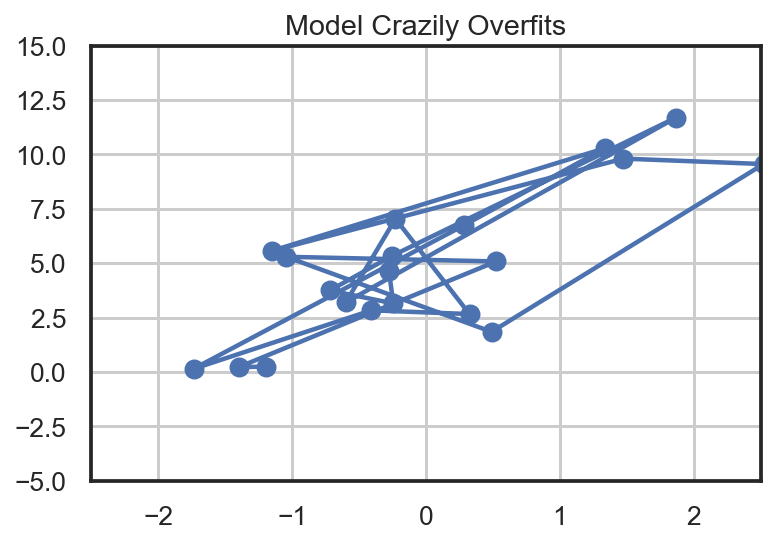

In [58]:
plt.axis([-2.5, 2.5, -5, 15])
plt.plot(x, y, '-o')
#plot_line(axis=plt.gca(), slope=0.2, intercept=5)
plt.grid(True)
plt.title('Model Crazily Overfits')
plt.show()

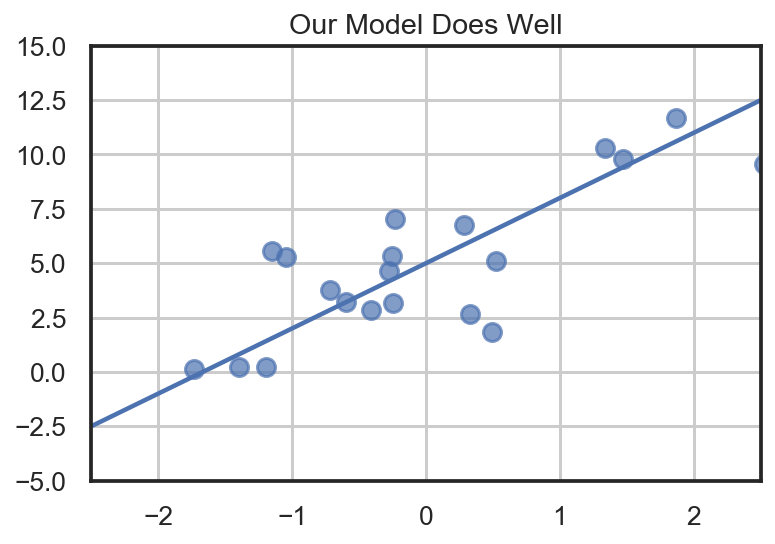

In [55]:
plt.axis([-2.5, 2.5, -5, 15])
plt.scatter(x, y, alpha=0.7)
plot_line(axis=plt.gca(), slope=3, intercept=5)
plt.grid(True)
plt.title('Our Model Does Well')
plt.show()

### Inductive Bias

In philosophy, inductive reasoning is when you come to a conclusion, using a premise that does `NOT` ascertain the conclusion (as opposed to what you get in deductive reasoning.) <br> 

An example: 

<center>All swans I have seen are black</center>
<center>Therefore, all swans are black</center>

Now, recall that this is all we do in machine learning: train machine learning models with the training data (_premise_), and _argue_ that such machine learning model generalizes to the test data (_conclusion_). Aha! The different kind of ways machine learning algorithm does this is what is called the <mark>induction bias</mark>, the assumptions they hold, sometimes it is called <mark>learning bias</mark>.

Here are examples of a few: 

| ML Algorithm| Inductive Bias |
| --- | --- |
| ___Decision Trees___ | Shorter trees are desired, use a combination of a subset of features |
| ___k-Nearest Neighbors___ | 1)Closer samples (in the euclidean space, defined by k-NN) are more likely to be same, 2) All samples are equally important |
| ___Support Vector Machines___ | Classes are separable by a hyperplane with some margin |
| ___Linear Regression___ | A linear relationship between the features and the response variable |
| ___Naive Bayes___ | Conditional independence of input features |
| ___Perceptron___ | A can viewed as a middle ground between decision trees and k-NN. It makes use of all the features but some are more weighted than the others |

All of these algorithm will be covered in future blogs. Also for the reader that is not familiar with ML, please note that there are many ML concepts that are not covered in this generalized overview notebook: bias and variance trade-off, optimization and generalizatio etc.; all of these concepts will come up in various forms in the blog. 

## References and Resources

- Tom Michell's Machine Learning
- __[Wikipedia, Induction bias](https://en.wikipedia.org/wiki/Inductive_bias)__
- __[Laura Diane Hamilton, The Inductive Biases of Various Machine Learning Algorithms October 01, 2014](http://www.lauradhamilton.com/inductive-biases-various-machine-learning-algorithms)__
- Introduction to Statistical Learning, Chapter 2: Statistical Learning